In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
import tensorflow.keras.backend as k
from tensorflow.keras.utils import get_custom_objects
from keras.utils.vis_utils import plot_model

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#tf.compat.v1.disable_eager_execution()

In [ ]:
# download the dataset
(x_train, y_train), (x_val, y_val) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# image classes or categories
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

In [ ]:
print("Number of Training Samples: ", len(x_train))
print("Number of Validation Samples: ", len(x_val))

Number of Training Samples:  60000
Number of Validation Samples:  10000


In [ ]:
# shape of images
print("Shape of Training images: ", x_train.shape)
print("Shape of Validation images: ", x_val.shape)

Shape of Training images:  (60000, 28, 28)
Shape of Validation images:  (10000, 28, 28)


In [ ]:
# reshape for training and testing
x_train = x_train.reshape(60000, 28, 28, 1)
x_val = x_val.reshape(10000, 28, 28, 1)

In [ ]:
# change data type
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')

In [ ]:
# normalize data into range 1-0
x_train /= 255.0
x_val /= 255.0

In [ ]:
print("Training shape: ", x_train.shape)
print("Validation shape: ", x_val.shape)

Training shape:  (60000, 28, 28, 1)
Validation shape:  (10000, 28, 28, 1)


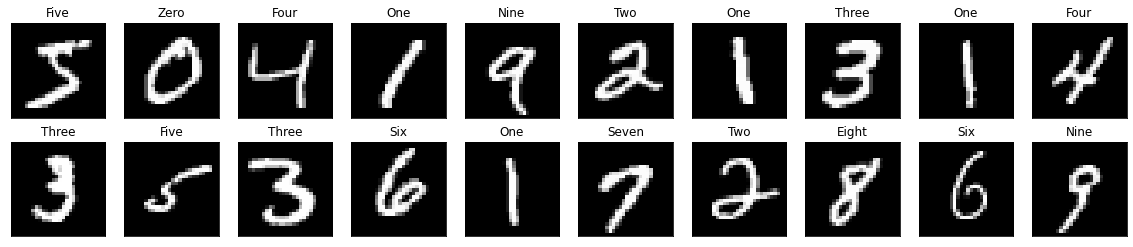

In [ ]:
# show some training images
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(x_train[idx].reshape(28, 28), cmap = 'gray')
  plt.title(class_names[y_train[idx]])

In [ ]:
input_shape = (28, 28, 1)
batch_size = 32
epochs = 5

In [ ]:
# create LeNet model on mnist data
model = Sequential()

# 1st Convolution Layer
model.add(Conv2D(filters = 20, kernel_size = (5, 5), input_shape = input_shape, padding = 'same'))

# Relu actvation layer 1
model.add(Activation('relu'))

# Polling layer
model.add(MaxPooling2D( pool_size = (2, 2)))

# 2nd Convolution Layer
model.add(Conv2D(filters = 50, kernel_size = (5, 5), padding = 'same'))

# Relu actvation layer 2
model.add(Activation('relu'))

# Polling layer 2
model.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten layer
model.add(Flatten())

# Fully connected or Dense layer
model.add(Dense(units = 500)) 

# Relu actvation layer 3
model.add(Activation('relu'))

# Fully connected or Dense layer
model.add(Dense(units = 10)) 

# softmax layer 3
model.add(Activation('softmax'))

# summary of model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 20)        520       
                                                                 
 activation_12 (Activation)  (None, 28, 28, 20)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 20)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 50)        25050     
                                                                 
 activation_13 (Activation)  (None, 14, 14, 50)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 50)         0         
 2D)                                                  

In [ ]:
# compile the model
model.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'sparse_categorical_crossentropy')

In [ ]:
# Fit the model on dataset
history = model.fit(x_train, y_train,
                    validation_data = (x_val, y_val),
                    batch_size = batch_size,
                    epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 43s 7ms/step - loss: 0.1075 - accuracy: 0.9671 - val_loss: 0.0455 - val_accuracy: 0.9863
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0368 - accuracy: 0.9885 - val_loss: 0.0416 - val_accuracy: 0.9861
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0257 - accuracy: 0.9917 - val_loss: 0.0313 - val_accuracy: 0.9902
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0181 - accuracy: 0.9943 - val_loss: 0.0296 - val_accuracy: 0.9909
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0147 - accuracy: 0.9952 - val_loss: 0.0318 - val_accuracy: 0.9909
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0114 - accuracy: 0.9964 - val_loss: 0.0398 - val_accuracy: 0.9889
Epoch 7/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0088 - accuracy: 0.9970 - val_loss: 0.0321 - val_ac

In [ ]:
history.history['val_accuracy']

[0.986299991607666,
 0.9861000180244446,
 0.9901999831199646,
 0.9908999800682068,
 0.9908999800682068,
 0.9889000058174133,
 0.9912999868392944,
 0.991100013256073,
 0.9901000261306763,
 0.9921000003814697,
 0.991100013256073,
 0.9916999936103821,
 0.9855999946594238,
 0.9896000027656555,
 0.98580002784729,
 0.9934999942779541,
 0.9916999936103821,
 0.9922999739646912,
 0.9927999973297119,
 0.991100013256073]

In [ ]:
history.history['val_loss']

[0.0454583615064621,
 0.04161575436592102,
 0.031347714364528656,
 0.029618896543979645,
 0.031807295978069305,
 0.03978146240115166,
 0.03212625905871391,
 0.03352877497673035,
 0.04545948654413223,
 0.03163060545921326,
 0.03832446411252022,
 0.043827082961797714,
 0.0864182710647583,
 0.05612156540155411,
 0.09384685754776001,
 0.040208928287029266,
 0.049572233110666275,
 0.04635453224182129,
 0.046250876039266586,
 0.04832373559474945]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#model.save('./drive/My Drive/CNN Models/Adversrial Patch Solution/models/LeNet_mnist.h5')

In [ ]:
#plot_model = plot_model(model, to_file = './drive/My Drive/CNN Models/Adversrial Patch Solution/models/LeNet_mnist.png')

In [ ]:
model = tf.keras.models.load_model('./drive/My Drive/CNN Models/Adversrial Patch Solution/models/LeNet_mnist.h5')

In [ ]:
# get images for getting adversarial examples
x_test = x_val[:1000]
y_test = y_val[:1000]

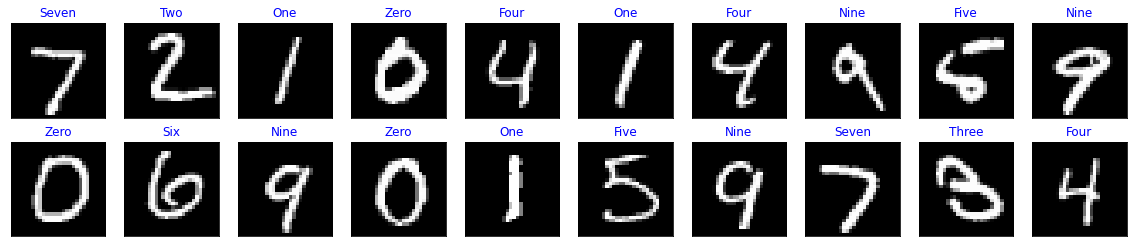

In [ ]:
# predict some testing images
predictions = model.predict(x_test)

# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(x_test[idx].reshape(28, 28), cmap = 'gray')
  
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(x_test[idx].reshape(28, 28), cmap = 'gray')
  plt.title(class_names[np.argmax(predictions[idx])], color =  color)

In [ ]:
# accuracy and loss of model on test data
orig_loss, orig_acc = model.evaluate(x_test, y_test)
print()
print("Model Accuracy on test images: ", round(orig_acc, 4))
print("Model Loss on test images: ", round(orig_loss, 4))

32/32 [==============================] - 0s 4ms/step - loss: 0.0998 - accuracy: 0.9840

Model Accuracy on test images:  0.984
Model Loss on test images:  0.0998


**Create Adversarial Attack**

## 1. Fast Gradient Sign Attack and Reconstruction of Adversarial Example

In [ ]:
#!pip install foolbox
import foolbox

In [ ]:
x_test = tf.cast(x_test, dtype = tf.float32)
y_test = tf.cast(y_test, dtype = tf.int32)

print(x_test.shape)
print(y_test.shape)

(1000, 28, 28, 1)
(1000,)


In [ ]:
fmodel = foolbox.TensorFlowModel(model = model, bounds = (0, 1))

c = foolbox.Misclassification(y_test)

attack = foolbox.attacks.FGSM()

_, adv_fgsm, success = attack(fmodel, x_test, criterion = c, epsilons = 0.3)

In [ ]:
adv_fgsm = adv_fgsm.numpy()
adv_fgsm.shape

(1000, 28, 28, 1)

In [ ]:
# evaluate the loss and accuracy of our model on adversarial examples.
adv_loss, adv_acc = model.evaluate(adv_fgsm, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(adv_acc, 4))
print("Model loss on Adversarial Example: ", round(adv_loss, 4))

32/32 [==============================] - 0s 6ms/step - loss: 12.8741 - accuracy: 0.1550

Model accuraccy on Adversarial Example:  0.155
Model loss on Adversarial Example:  12.8741


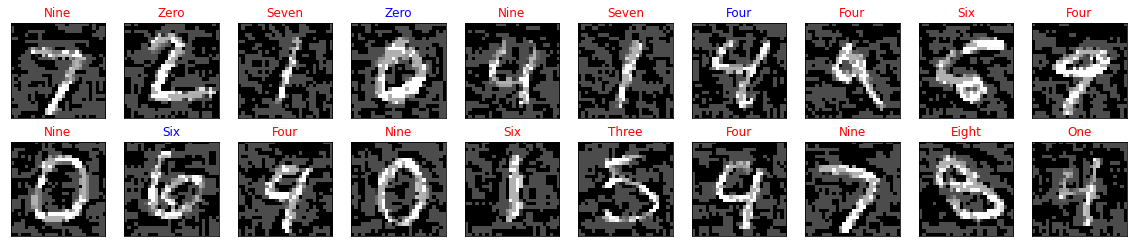

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_fgsm)

# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(np.clip(adv_fgsm[idx].reshape(28, 28), 0, 1), cmap = 'gray')
  
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[np.argmax(predictions[idx])], color = color)

In [ ]:
print("Average L1 Norm: ", round(tf.norm(adv_fgsm - x_test, ord = 1).numpy() / len(x_test), 4))
print("Average L2 Norm: ", round(tf.norm(adv_fgsm - x_test, ord = 2).numpy()/ len(x_test), 4))
print("Average L_inf Norm: ", round(tf.norm(adv_fgsm - x_test, ord = np.inf).numpy()/ len(x_test), 4))

Average L1 Norm:  126.3622
Average L2 Norm:  0.1935
Average L_inf Norm:  0.0003


**Reconstruction of Adversarila Examples**

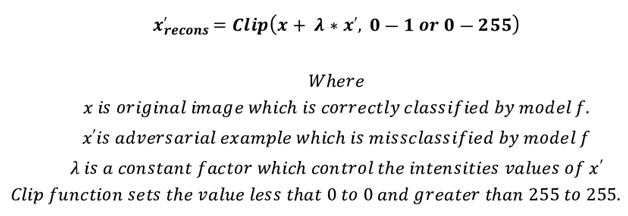

In [ ]:
rest_adv_fgsm = x_test + 0.03 * adv_fgsm
rest_adv_fgsm = np.clip(rest_adv_fgsm, 0, 1)

**Test reconstructed adversarial example by model to check its Accuracy and Loss**

In [ ]:
# applying our model on reconstructed adversarial examples
rest_loss, rest_acc = model.evaluate(rest_adv_fgsm, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(rest_acc, 4))
print("Model loss on Adversarial Example: ", round(rest_loss, 4))

32/32 [==============================] - 0s 5ms/step - loss: 0.1761 - accuracy: 0.9730

Model accuraccy on Adversarial Example:  0.973
Model loss on Adversarial Example:  0.1761


In [ ]:
print('Sucess rate of Defence Model: ', round(rest_acc / orig_acc, 4))

Sucess rate of Defence Model:  0.9888


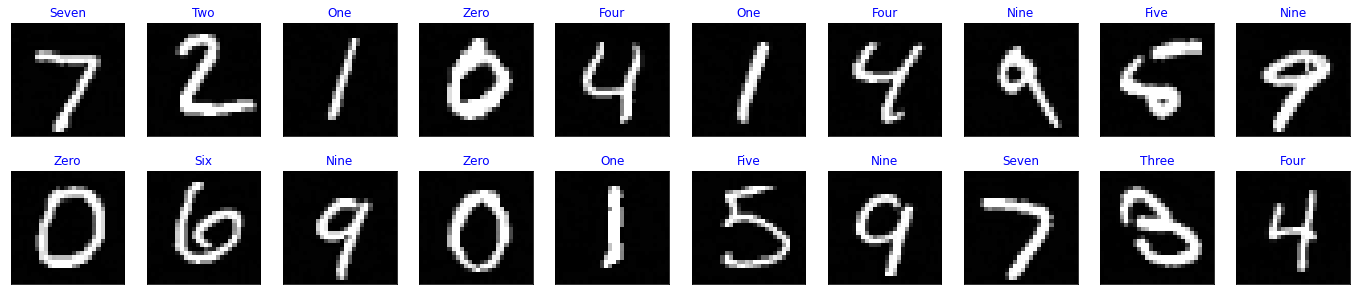

In [ ]:
# predict some testing images
predictions = model.predict(rest_adv_fgsm)

# show test images
fig = plt.figure(figsize = (24, 5))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(rest_adv_fgsm[idx].reshape(28, 28), cmap = 'gray')
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'
  plt.title(class_names[np.argmax(predictions[idx])], color = color)

In [ ]:
ssim = tf.image.ssim(x_test, rest_adv_fgsm, max_val = 1, filter_size=11, filter_sigma=1.5, k1=0.01, k2=0.03)
ssim = ssim.numpy()
print("Average Structure Similarity Index between original and restored Examples:", round(ssim.mean(), 4))
print()

psnr = tf.image.psnr(x_test, rest_adv_fgsm, max_val = 255)
print("Average Peak Signal-to-Noise Ratio between original and restored Examples:", psnr.numpy().mean())

Average Structure Similarity Index between original and restored Examples: 0.9715

Average Peak Signal-to-Noise Ratio between original and restored Examples: 89.55158


# 2. Basic Iterative Method (Attack) and Reconstruction of Adversarial Examples 

In [ ]:
#!pip install foolbox
import foolbox

In [ ]:
x_test = tf.cast(x_test, dtype = tf.float32)
y_test = tf.cast(y_test, dtype = tf.int32)

print(x_test.shape)
print(y_test.shape)

(1000, 28, 28, 1)
(1000,)


In [ ]:
fmodel = foolbox.TensorFlowModel(model = model, bounds = (0, 1))

c = foolbox.Misclassification(y_test)

attack = foolbox.attacks.LinfBasicIterativeAttack()

_, adv_bim, success = attack(fmodel, x_test, criterion = c, epsilons = 0.1)

In [ ]:
adv_bim = adv_bim.numpy()
adv_bim.shape

(1000, 28, 28, 1)

In [ ]:
# evaluate the loss and accuracy of our model on adversarial examples.
adv_loss, adv_acc = model.evaluate(adv_bim, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(adv_acc, 4))
print("Model loss on Adversarial Example: ", round(adv_loss, 4))

32/32 [==============================] - 0s 5ms/step - loss: 11.3858 - accuracy: 0.2000

Model accuraccy on Adversarial Example:  0.2
Model loss on Adversarial Example:  11.3858


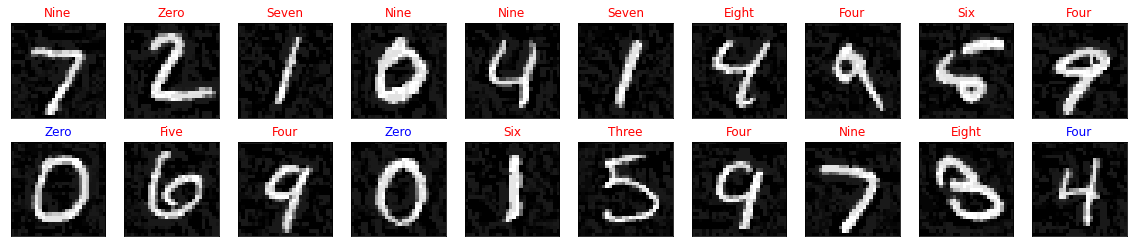

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_bim)

# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(np.clip(adv_bim[idx].reshape(28, 28), 0, 1), cmap = 'gray')
  
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[np.argmax(predictions[idx])], color = color)

In [ ]:
print("Average L1 Norm: ", round(tf.norm(adv_bim - x_test, ord = 1).numpy() / len(x_test), 4))
print("Average L2 Norm: ", round(tf.norm(adv_bim - x_test, ord = 2).numpy()/ len(x_test), 4))
print("Average L_inf Norm: ", round(tf.norm(adv_bim - x_test, ord = np.inf).numpy()/ len(x_test), 4))

Average L1 Norm:  38.3025
Average L2 Norm:  0.0574
Average L_inf Norm:  0.0001


**Reconstruction of Adversarila Examples**

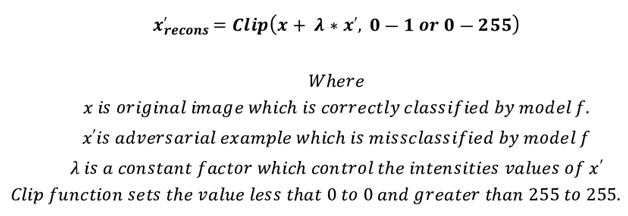

In [ ]:
rest_adv_bim = x_test + 0.03 * adv_bim
rest_adv_bim = np.clip(rest_adv_bim, 0, 1)

**Test reconstructed adversarial example by model to check its Accuracy and Loss**

In [ ]:
# applying our model on reconstructed adversarial examples
rest_loss, rest_acc = model.evaluate(rest_adv_bim, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(rest_acc, 4))
print("Model loss on Adversarial Example: ", round(rest_loss, 4))

32/32 [==============================] - 0s 5ms/step - loss: 0.1121 - accuracy: 0.9830

Model accuraccy on Adversarial Example:  0.983
Model loss on Adversarial Example:  0.1121


In [ ]:
print('Sucess rate of Defence Model: ', round(rest_acc / orig_acc, 4))

Sucess rate of Defence Model:  0.999


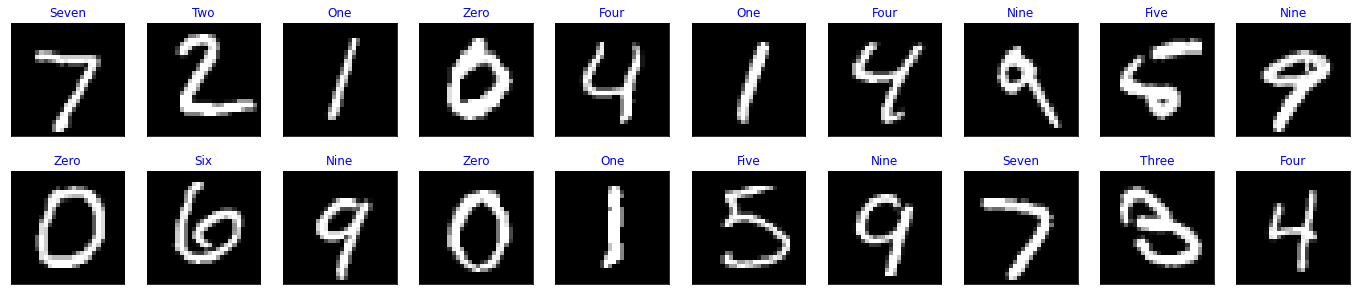

In [ ]:
# predict some testing images
predictions = model.predict(rest_adv_bim)

# show test images
fig = plt.figure(figsize = (24, 5))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(rest_adv_bim[idx].reshape(28, 28), cmap = 'gray')
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'
  plt.title(class_names[np.argmax(predictions[idx])], color = color)

In [ ]:
ssim = tf.image.ssim(x_test, rest_adv_bim, max_val = 1, filter_size=11, filter_sigma=1.5, k1=0.01, k2=0.03)
ssim = ssim.numpy()
print("Average Structure Similarity Index between original and restored Examples:", round(ssim.mean(), 4))
print()

psnr = tf.image.psnr(x_test, rest_adv_bim, max_val = 255)
psnr = psnr.numpy()
print("Average Peak Signal-to-Noise Ratio between original and restored Examples:", psnr.mean())

Average Structure Similarity Index between original and restored Examples: 0.9964

Average Peak Signal-to-Noise Ratio between original and restored Examples: 92.186935


#3. Projected Gradient Descent Attack and Reconstruction of Adverasarial Examples

In [ ]:
#!pip install foolbox
import foolbox

In [ ]:
x_test = tf.cast(x_test, dtype = tf.float32)
y_test = tf.cast(y_test, dtype = tf.int32)

print(x_test.shape)
print(y_test.shape)

(1000, 28, 28, 1)
(1000,)


In [ ]:
fmodel = foolbox.TensorFlowModel(model = model, bounds = (0, 1))

c = foolbox.Misclassification(y_test)

attack = foolbox.attacks.PGD()

_, adv_pgd, success = attack(fmodel, x_test, criterion = c, epsilons = 0.12)

In [ ]:
adv_pgd = adv_pgd.numpy()
adv_pgd.shape

(1000, 28, 28, 1)

In [ ]:
# evaluate the loss and accuracy of our model on adversarial examples.
adv_loss, adv_acc = model.evaluate(adv_pgd, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(adv_acc, 4))
print("Model loss on Adversarial Example: ", round(adv_loss, 4))

32/32 [==============================] - 0s 5ms/step - loss: 15.7785 - accuracy: 0.1250

Model accuraccy on Adversarial Example:  0.125
Model loss on Adversarial Example:  15.7785


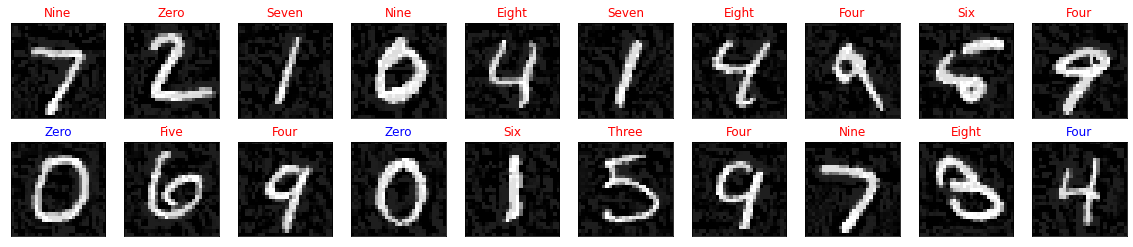

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_pgd)

# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(np.clip(adv_pgd[idx].reshape(28, 28), 0, 1), cmap = 'gray')
  
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[np.argmax(predictions[idx])], color = color)

In [ ]:
print("Average L1 Norm: ", round(tf.norm(adv_pgd - x_test, ord = 1).numpy() / len(x_test), 4))
print("Average L2 Norm: ", round(tf.norm(adv_pgd - x_test, ord = 2).numpy() / len(x_test), 4))
print("Average L_inf Norm: ", round(tf.norm(adv_pgd - x_test, ord = np.inf).numpy() / len(x_test), 4))

Average L1 Norm:  44.3827
Average L2 Norm:  0.0665
Average L_inf Norm:  0.0001


In [ ]:
import scipy
from scipy.spatial.distance import cdist

# l1-norm between original images and adversarial examples
l1_norm = []
for i in np.arange(1000):
  l1 = cdist(adv_pgd[i].reshape(28, 28), x_test[i].numpy().reshape(28, 28), metric='cityblock') # euclidean, cityblock, chebyshev
  l1_norm.append(l1)

# l2-norm between original images and adversarial examples
l2_norm = []
for i in np.arange(1000):
  l2 = cdist(adv_pgd[i].reshape(28, 28), x_test[i].numpy().reshape(28, 28), metric='euclidean') # euclidean, cityblock, chebyshev
  l2_norm.append(l2)

# l_inf-norm between original images and adversarial examples
l_inf_norm = []
for i in np.arange(1000):
  l_inf = cdist(adv_pgd[i].reshape(28, 28), x_test[i].numpy().reshape(28, 28), metric='chebyshev') # euclidean, cityblock, chebyshev
  l_inf_norm.append(l_inf)

In [ ]:
l1_norm = np.asarray(l1_norm)
l2_norm = np.asarray(l2_norm)
l_inf_norm = np.asarray(l_inf_norm)

print("Average L1 Norm: ", round(l1_norm.mean(), 4))
print("Average L2 Norm: ", round(l2_norm.mean(), 4))
print("Average L_inf Norm: ", round(l_inf_norm.mean(), 4))

Average L1 Norm:  5.3404
Average L2 Norm:  1.6695
Average L_inf Norm:  0.8077


**Reconstruction of Adversarila Examples**

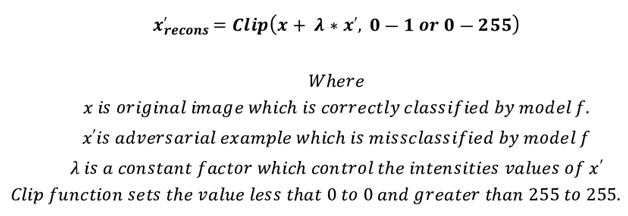

In [ ]:
rest_adv_pgd = x_test + 0.03 * adv_pgd
rest_adv_pgd = np.clip(rest_adv_pgd, 0, 1)

**Test reconstructed adversarial example by model to check its Accuracy and Loss**

In [ ]:
# applying our model on reconstructed adversarial examples
rest_loss, rest_acc = model.evaluate(rest_adv_pgd, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(rest_acc, 4))
print("Model loss on Adversarial Example: ", round(rest_loss, 4))

32/32 [==============================] - 0s 5ms/step - loss: 0.1134 - accuracy: 0.9830

Model accuraccy on Adversarial Example:  0.983
Model loss on Adversarial Example:  0.1134


In [ ]:
print('Sucess rate of Defence Model: ', round(rest_acc / orig_acc, 4))

Sucess rate of Defence Model:  0.999


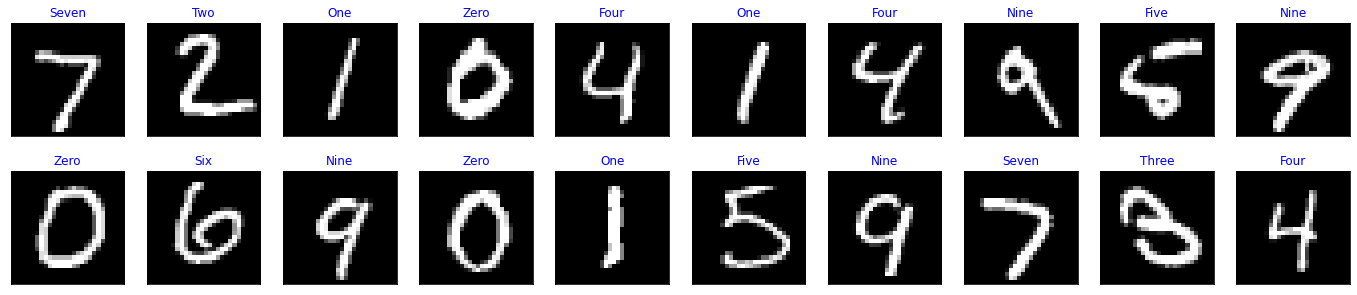

In [ ]:
# predict some testing images
predictions = model.predict(rest_adv_pgd)

# show test images
fig = plt.figure(figsize = (24, 5))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(rest_adv_pgd[idx].reshape(28, 28), cmap = 'gray')
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'
  plt.title(class_names[np.argmax(predictions[idx])], color = color)

In [ ]:
ssim = tf.image.ssim(x_test, rest_adv_pgd, max_val = 1, filter_size=11, filter_sigma=1.5, k1=0.01, k2=0.03)
ssim = ssim.numpy()
print("Average Structure Similarity Index between original and restored Examples:", round(ssim.mean(), 4))
print()

psnr = tf.image.psnr(x_test, rest_adv_pgd, max_val = 255)
psnr = psnr.numpy()
print("Average Peak Signal-to-Noise Ratio between original and restored Examples:", psnr.mean())

Average Structure Similarity Index between original and restored Examples: 0.9954

Average Peak Signal-to-Noise Ratio between original and restored Examples: 92.06794


#Deep Fool Attack and Reconstruction of Adverasarial Examples

In [ ]:
#!pip install foolbox
import foolbox

In [ ]:
x_test = tf.cast(x_test, dtype = tf.float32)
y_test = tf.cast(y_test, dtype = tf.int32)

print(x_test.shape)
print(y_test.shape)

(1000, 28, 28, 1)
(1000,)


In [ ]:
fmodel = foolbox.TensorFlowModel(model = model, bounds = (0, 1))

c = foolbox.Misclassification(y_test)

attack = foolbox.attacks.L2DeepFoolAttack()

_, adv_dfa, success = attack(fmodel, x_test, criterion = c, epsilons = 5)

In [ ]:
adv_dfa = adv_dfa.numpy()
adv_dfa.shape

(1000, 28, 28, 1)

In [ ]:
# evaluate the loss and accuracy of our model on adversarial examples.
adv_loss, adv_acc = model.evaluate(adv_dfa, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(adv_acc, 4))
print("Model loss on Adversarial Example: ", round(adv_loss, 4))

32/32 [==============================] - 0s 6ms/step - loss: 9.2399 - accuracy: 0.3210

Model accuraccy on Adversarial Example:  0.321
Model loss on Adversarial Example:  9.2399


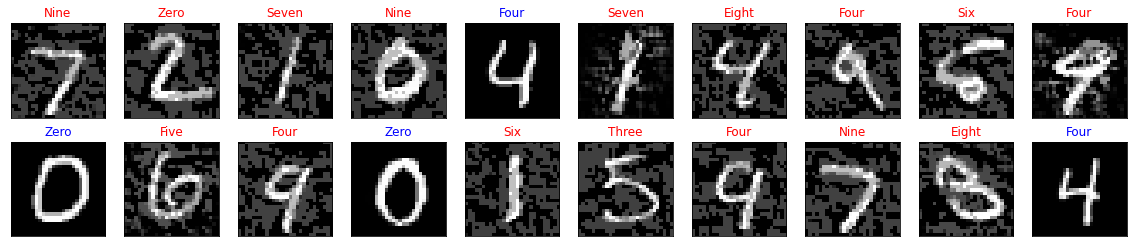

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_dfa)

# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(np.clip(adv_dfa[idx].reshape(28, 28), 0, 1), cmap = 'gray')
  
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[np.argmax(predictions[idx])], color = color)

In [ ]:
print("Average L1 Norm: ", round(tf.norm(adv_dfa - x_test, ord = 1).numpy() / len(x_test), 4))
print("Average L2 Norm: ", round(tf.norm(adv_dfa - x_test, ord = 2).numpy()/ len(x_test), 4))
print("Average L_inf Norm: ", round(tf.norm(adv_dfa - x_test, ord = np.inf).numpy()/ len(x_test), 4))

Average L1 Norm:  68.4518
Average L2 Norm:  0.1329
Average L_inf Norm:  0.001


**Reconstruction of Adversarila Examples**

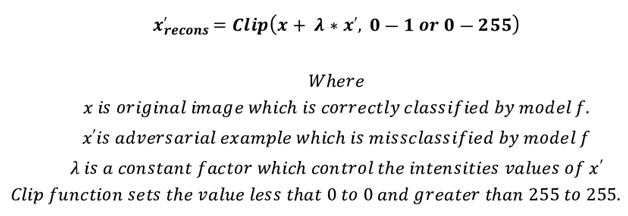

In [ ]:
rest_adv_dfa = x_test + 0.03 * adv_dfa
rest_adv_dfa = np.clip(rest_adv_dfa, 0, 1)

**Test reconstructed adversarial example by model to check its Accuracy and Loss**

In [ ]:
# applying our model on reconstructed adversarial examples
rest_loss, rest_acc = model.evaluate(rest_adv_dfa, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(rest_acc, 4))
print("Model loss on Adversarial Example: ", round(rest_loss, 4))

32/32 [==============================] - 0s 5ms/step - loss: 0.1000 - accuracy: 0.9830

Model accuraccy on Adversarial Example:  0.983
Model loss on Adversarial Example:  0.1


In [ ]:
print('Sucess rate of Defence Model: ', round(rest_acc / orig_acc, 4))

Sucess rate of Defence Model:  0.999


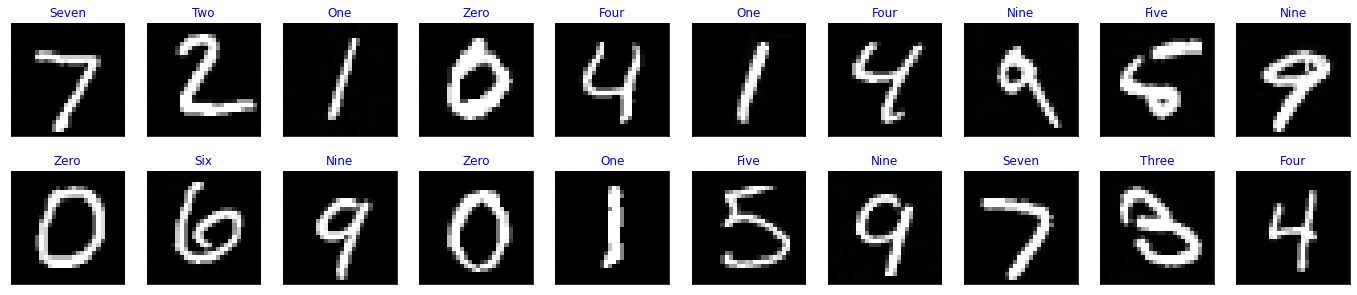

In [ ]:
# predict some testing images
predictions = model.predict(rest_adv_dfa)

# show test images
fig = plt.figure(figsize = (24, 5))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(rest_adv_dfa[idx].reshape(28, 28), cmap = 'gray')
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'
  plt.title(class_names[np.argmax(predictions[idx])], color = color)

In [ ]:
ssim = tf.image.ssim(x_test, rest_adv_dfa, max_val = 1, filter_size = 11, filter_sigma = 1.5, k1 = 0.01, k2 = 0.03)
ssim = ssim.numpy()
print("Average Structure Similarity Index between original and restored Examples:", round(ssim.mean(), 4))
print()

psnr = tf.image.psnr(x_test, rest_adv_dfa, max_val = 255)
psnr = psnr.numpy()
print("Average Peak Signal-to-Noise Ratio between original and restored Examples:", psnr.mean())

Average Structure Similarity Index between original and restored Examples: 0.9827

Average Peak Signal-to-Noise Ratio between original and restored Examples: 90.93583


#Carlini & Wagner attack and Reconstruction of Adverasarial Examples

In [ ]:
#!pip install foolbox
import foolbox

In [ ]:
x_test = tf.cast(x_test, dtype = tf.float32)
y_test = tf.cast(y_test, dtype = tf.int32)

print(x_test.shape)
print(y_test.shape)

(1000, 28, 28, 1)
(1000,)


In [ ]:
fmodel = foolbox.TensorFlowModel(model = model, bounds = (0, 1))

c = foolbox.Misclassification(y_test)

attack = foolbox.attacks.L2CarliniWagnerAttack()

_, adv_cwa, success = attack(fmodel, x_test, criterion = c, epsilons = 7)

In [ ]:
adv_cwa = adv_cwa.numpy()
adv_cwa.shape

(1000, 28, 28, 1)

In [ ]:
# evaluate the loss and accuracy of our model on adversarial examples.
adv_loss, adv_acc = model.evaluate(adv_cwa, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(adv_acc, 4))
print("Model loss on Adversarial Example: ", round(adv_loss, 4))

32/32 [==============================] - 0s 5ms/step - loss: 1.6371 - accuracy: 0.4910

Model accuraccy on Adversarial Example:  0.491
Model loss on Adversarial Example:  1.6371


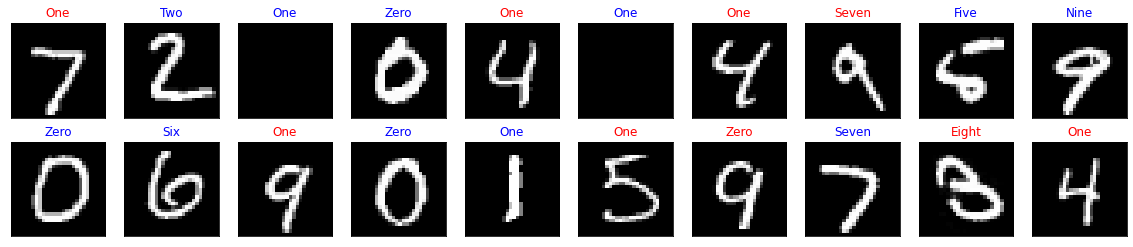

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_cwa)

# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(np.clip(adv_cwa[idx].reshape(28, 28), 0, 1), cmap = 'gray')
  
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[np.argmax(predictions[idx])], color = color)

In [ ]:
print("Average L1 Norm: ", round(tf.norm(adv_cwa - x_test, ord = 1).numpy() / len(x_test), 4))
print("Average L2 Norm: ", round(tf.norm(adv_cwa - x_test, ord = 2).numpy()/ len(x_test), 4))
print("Average L_inf Norm: ", round(tf.norm(adv_cwa - x_test, ord = np.inf).numpy()/ len(x_test), 4))

Average L1 Norm:  63.6779
Average L2 Norm:  0.2032
Average L_inf Norm:  0.001


**Reconstruction of Adversarila Examples**

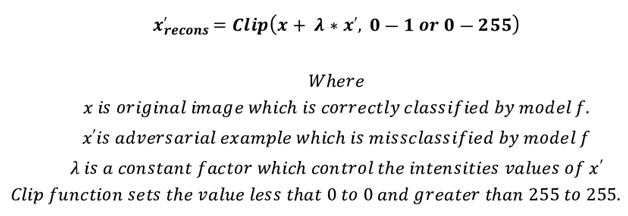

In [ ]:
rest_adv_cwa = x_test + 0.03 * adv_cwa
rest_adv_cwa = np.clip(rest_adv_cwa, 0, 1)

**Test reconstructed adversarial example by model to check its Accuracy and Loss**

In [ ]:
# applying our model on reconstructed adversarial examples
rest_loss, rest_acc = model.evaluate(rest_adv_cwa, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(rest_acc, 4))
print("Model loss on Adversarial Example: ", round(rest_loss, 4))

32/32 [==============================] - 0s 5ms/step - loss: 0.0986 - accuracy: 0.9840

Model accuraccy on Adversarial Example:  0.984
Model loss on Adversarial Example:  0.0986


In [ ]:
print('Sucess rate of Defence Model: ', round(rest_acc / orig_acc, 4))

Sucess rate of Defence Model:  1.0


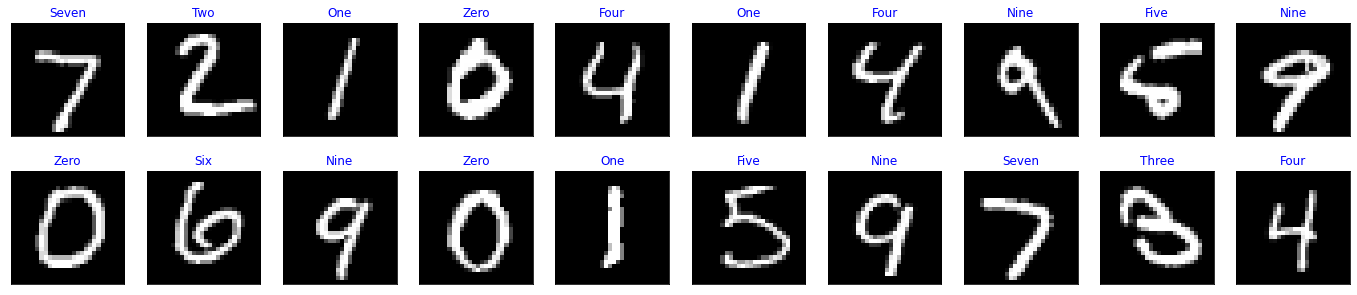

In [ ]:
# predict some testing images
predictions = model.predict(rest_adv_cwa)

# show test images
fig = plt.figure(figsize = (24, 5))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(rest_adv_cwa[idx].reshape(28, 28), cmap = 'gray')
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'
  plt.title(class_names[np.argmax(predictions[idx])], color = color)

In [ ]:
ssim = tf.image.ssim(x_test, rest_adv_cwa, max_val = 1, filter_size = 11, filter_sigma = 1.5, k1 = 0.01, k2 = 0.03)
ssim = ssim.numpy()
print("Average Structure Similarity Index between original and restored Examples:", round(ssim.mean(), 4))
print()

psnr = tf.image.psnr(x_test, rest_adv_cwa, max_val = 255)
psnr = psnr.numpy()
print("Average Peak Signal-to-Noise Ratio between original and restored Examples:", psnr.mean())

Average Structure Similarity Index between original and restored Examples: 0.9999

Average Peak Signal-to-Noise Ratio between original and restored Examples: inf


# Spatial attack and Reconstruction of Adverasarial Examples

In [ ]:
#!pip install foolbox
import foolbox

In [ ]:
x_test = tf.cast(x_test, dtype = tf.float32)
y_test = tf.cast(y_test, dtype = tf.int32)

print(x_test.shape)
print(y_test.shape)

(1000, 28, 28, 1)
(1000,)


In [ ]:
fmodel = foolbox.TensorFlowModel(model = model, bounds = (0, 1))

c = foolbox.Misclassification(y_test)

attack = foolbox.attacks.SpatialAttack()

_, adv_spa, success = attack(fmodel, x_test, criterion = c)

In [ ]:
adv_spa = adv_spa.numpy()
adv_spa.shape

(1000, 28, 28, 1)

In [ ]:
# evaluate the loss and accuracy of our model on adversarial examples.
adv_loss, adv_acc = model.evaluate(adv_spa, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(adv_acc, 4))
print("Model loss on Adversarial Example: ", round(adv_loss, 4))

32/32 [==============================] - 0s 5ms/step - loss: 9.4784 - accuracy: 0.0000e+00

Model accuraccy on Adversarial Example:  0.0
Model loss on Adversarial Example:  9.4784


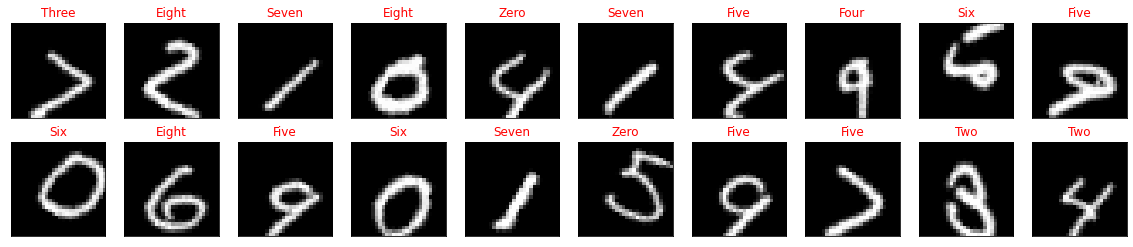

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_spa)

# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(np.clip(adv_spa[idx].reshape(28, 28), 0, 1), cmap = 'gray')
  
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[np.argmax(predictions[idx])], color = color)

In [ ]:
print("Average L1 Norm: ", round(tf.norm(adv_spa - x_test, ord = 1).numpy() / len(x_test), 4))
print("Average L2 Norm: ", round(tf.norm(adv_spa - x_test, ord = 2).numpy()/ len(x_test), 4))
print("Average L_inf Norm: ", round(tf.norm(adv_spa - x_test, ord = np.inf).numpy()/ len(x_test), 4))

Average L1 Norm:  127.2537
Average L2 Norm:  0.3104
Average L_inf Norm:  0.001


**Reconstruction of Adversarila Examples**

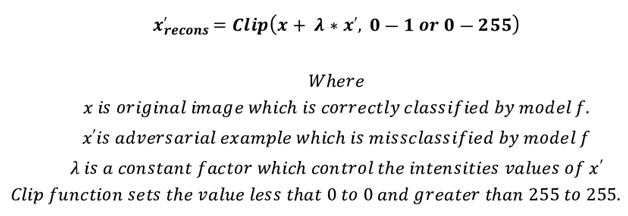

In [ ]:
rest_adv_spa = x_test + 0.03 * adv_spa
rest_adv_spa = np.clip(rest_adv_spa, 0, 1)

**Test reconstructed adversarial example by model to check its Accuracy and Loss**

In [ ]:
# applying our model on reconstructed adversarial examples
rest_loss, rest_acc = model.evaluate(rest_adv_spa, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(rest_acc, 4))
print("Model loss on Adversarial Example: ", round(rest_loss, 4))

32/32 [==============================] - 0s 5ms/step - loss: 0.0992 - accuracy: 0.9840

Model accuraccy on Adversarial Example:  0.984
Model loss on Adversarial Example:  0.0992


In [ ]:
print('Sucess rate of Defence Model: ', round(rest_acc / orig_acc, 4))

Sucess rate of Defence Model:  1.0


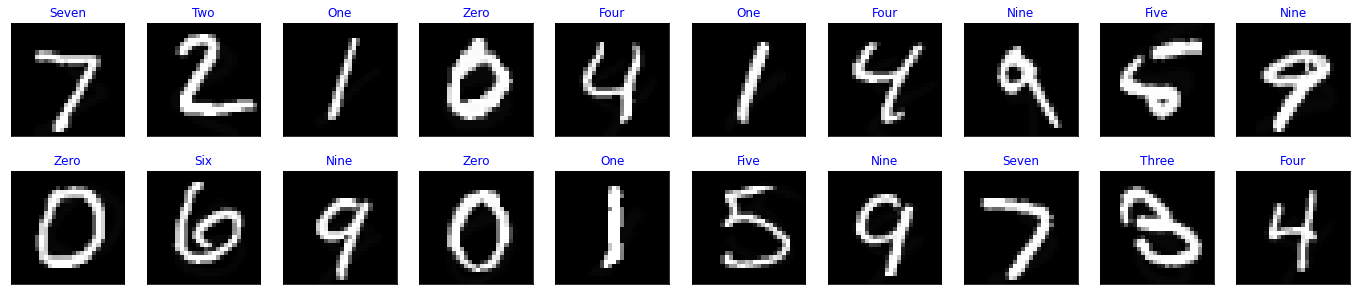

In [ ]:
# predict some testing images
predictions = model.predict(rest_adv_spa)

# show test images
fig = plt.figure(figsize = (24, 5))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(rest_adv_spa[idx].reshape(28, 28), cmap = 'gray')
  if class_names[y_test[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'
  plt.title(class_names[np.argmax(predictions[idx])], color = color)

In [ ]:
ssim = tf.image.ssim(x_test, rest_adv_spa, max_val = 1, filter_size = 11, filter_sigma = 1.5, k1 = 0.01, k2 = 0.03)
ssim = ssim.numpy()
print("Average Structure Similarity Index between original and restored Examples:", round(ssim.mean(), 4))
print()

psnr = tf.image.psnr(x_test, rest_adv_spa, max_val = 255)
psnr = psnr.numpy()
print("Average Peak Signal-to-Noise Ratio between original and restored Examples:", psnr.mean())

Average Structure Similarity Index between original and restored Examples: 0.9828

Average Peak Signal-to-Noise Ratio between original and restored Examples: 90.00746
